<a href="https://colab.research.google.com/github/anryisreal/Dataset/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Работа с файлами в Google Colab

### Этап 1. Подгрузка файлов

Способ 1. Вручную через вкладку 'Файлы'

In [ ]:
# см. материалы урока на сайте

Способ 2. Через модуль files библиотеки google.colab

In [ ]:
# из библиотеки google.colab импортируем класс files
from google.colab import files

In [81]:
# создаем объект этого класса, применяем метод .upload()
uploaded = files.upload()

Saving student-por.csv to student-por.csv


In [ ]:
# посмотрим на содержимое словаря uploaded
# uploaded

### Этап 2. Чтение файлов

#### Просмотр содержимого папки /content/

##### Модуль os и метод .walk()

In [82]:
# импортируем модуль os
import os

# выводим пути к папкам (dirpath) и наименования файлов (filenames) и после этого
for dirpath, _, filenames in os.walk('/content/'):

  # во вложенном цикле проходимся по названиям файлов
  for filename in filenames:

    # и соединяем путь до папок и входящие в эти папки файлы
    # с помощью метода path.join()
    print(os.path.join(dirpath, filename))

/content/student-por.csv
/content/student-mat.csv
/content/.config/.last_update_check.json
/content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
/content/.config/config_sentinel
/content/.config/default_configs.db
/content/.config/active_config
/content/.config/.last_survey_prompt.yaml
/content/.config/.last_opt_in_prompt.yaml
/content/.config/gce
/content/.config/logs/2024.10.21/13.21.53.990169.log
/content/.config/logs/2024.10.21/13.22.05.109353.log
/content/.config/logs/2024.10.21/13.22.15.226603.log
/content/.config/logs/2024.10.21/13.22.15.869361.log
/content/.config/logs/2024.10.21/13.22.04.157217.log
/content/.config/logs/2024.10.21/13.21.33.039045.log
/content/.config/configurations/config_default
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_test.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_test.csv


##### Команда `!ls`

In [83]:
# посмотрим на содержимое папки content
!ls

sample_data  student-mat.csv  student-por.csv


In [84]:
# заглянем внутрь sample_data
!ls /content/sample_data/

anscombe.json		     california_housing_train.csv  mnist_train_small.csv
california_housing_test.csv  mnist_test.csv		   README.md


#### Чтение из переменной uploaded

In [87]:
# посмотрим на тип значений словаря uploaded
type(uploaded['student-por.csv'])

bytes

Пример работы с объектом bytes

In [88]:
# обратимся к ключу словаря uploaded и применим метод .decode()
uploaded_str = uploaded['student-por.csv'].decode()

# на выходе получаем обычную строку
print(type(uploaded_str))

<class 'str'>


In [89]:
# выведем первые 35 значений
print(uploaded_str[:35])

school,sex,age,address,famsize,Psta


In [90]:
# если разбить строку методом .split() по символам \r (возврат к началу строки) и \n (новая строка)
uploaded_list = uploaded_str.split('\r\n')

# на выходе мы получим список
type(uploaded_list)

list

In [91]:
# пройдемся по этому списку, не забыв создать индекс с помощью функции enumerate()
for i, line in enumerate(uploaded_list):

  # начнем выводить записи
  print(line)

  # когда дойдем до четвертой строки
  if i == 3:

    # прервемся
    break

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,2,1,2,5,6,12,12,13
GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,13,12,13
GP,F,17,U,GT3,A,4,4,other,teacher,home,mot

#### Использование функции open() и конструкции with open()

In [93]:
# передадим функции open() адрес файла
# параметр 'r' означает, что мы хотим прочитать (read) файл
f1 = open('/content/student-mat.csv', 'r')

# метод .read() помещает весь файл в одну строку
# выведем первые 142 символа (если параметр не указывать, выведется все содержимое)
print(f1.read(142))

# в конце файл необходимо закрыть
f1.close()

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nurs


In [94]:
# снова откроем файл
f2 = open('/content/student-mat.csv', 'r')

# пройдемся по нашему объекту в цикле for и параллельно создадим индекс
for i, line in enumerate(f2):

    # выведем строки без служебных символов по краям
    print(line.strip())

    # дойдя до четвертой строки, прервемся
    if i == 3:
      break

# не забудем закрыть файл
f2.close()

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10


In [95]:
# скажем Питону: "открой файл  и назови его f3"
with open('/content/student-mat.csv', 'r') as f3:

  # "пройдись по строкам без служебных символов"
  for i, line in enumerate(f3):
    print(line.strip())

    # и "прервись на четвертой строке"
    if i == 3:
      break

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10


#### Чтение через библиотеку Pandas

In [96]:
# импортируем библиотеку
import pandas as pd

# применим функцию read_csv() и посмотрим на первые три записи файла train.csv
train = pd.read_csv('/content/student-mat.csv')
train.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10


In [97]:
# сделаем то же самое с файлом test.csv
test = pd.read_csv('/content/student-mat.csv')
test.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10


### Этап 3. Построение модели и прогноз

#### **Шаг 1**. Обработка и анализ данных

Исследовательский анализ данных (EDA)

In [98]:
# посмотрим на данные в целом
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [99]:
# для построения графиков воспользуемся новой для нас библиотекой seaborn
import seaborn as sns

<Axes: xlabel='Dalc', ylabel='count'>

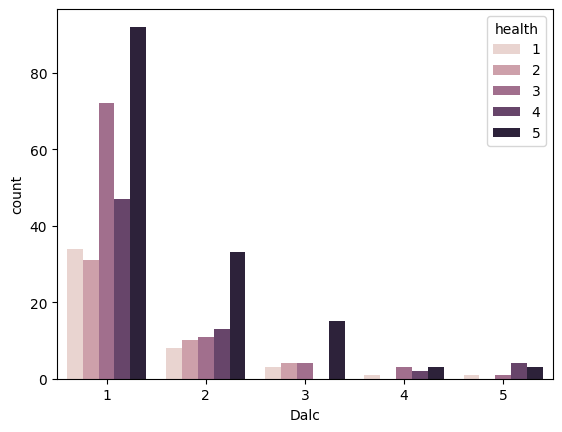

In [101]:
# посмотрим насколько значим класс билета для выживания пассажира
# с помощью x и hue мы можем уместить две категориальные переменные на одном графике
sns.countplot(x = 'Dalc', hue = 'health', data = train)

<Axes: xlabel='sex', ylabel='count'>

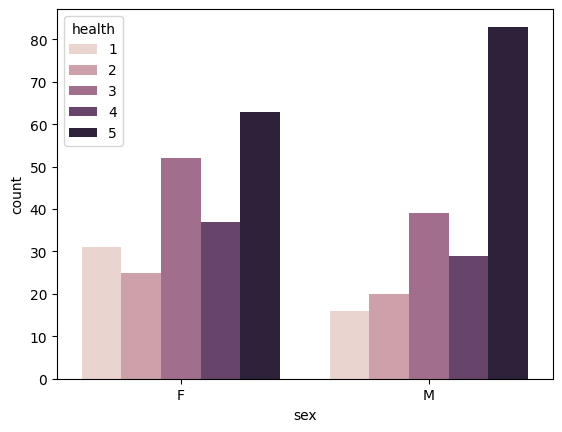

In [102]:
# кто выживал чаще, мужчины или женщины?
sns.countplot(x = 'sex', hue = 'health', data = train)

Пропущенные значения

In [103]:
# выявим пропущенные значения с помощью .isnull() и посчитаем их количество через sum()
train.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [105]:
# переменная Cabin (номер каюты), скорее всего, не является самой важной
# избавимся от нее с помощью метода .drop()
# (параметр axis = 1 отвечает за столбцы, inplace = True сохраняет изменения)
train.drop(columns = 'schoolsup', axis = 1, inplace = True)

In [ ]:
# а вот Age (возраст) скорее важен, заменим пустые значения средним арифметическим
train['Age'].fillna(train['Age'].mean(), inplace = True)

In [ ]:
# у нас остаются две пустые строки в Embarked, удалим их
train.dropna(inplace = True)

In [ ]:
# посмотрим на результат
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Категориальные переменные

In [107]:
# применим one-hot encoding к переменной Sex (пол) с помощью функции pd.get_dummies()
pd.get_dummies(train['sex']).head(3)

,F,M
0,True,False
1,True,False
2,True,False


In [110]:
# снова скачаем столбец Sex из датасета train в формате датафрейма
previous = pd.read_csv('/content/student-mat.csv')[['sex']]
previous.head()

,sex
0,F
1,F
2,F
3,F
4,F


In [111]:
# закодируем переменную через 0 и 1
pd.get_dummies(previous['sex'], dtype = int).head(3)

,F,M
0,1,0
1,1,0
2,1,0


In [108]:
# удалим первый столбец, он избыточен
sex = pd.get_dummies(train['sex'], drop_first = True)
sex.head(3)

,M
0,False
1,False
2,False


In [114]:
# сделаем то же самое для переменных Pclass и Embarked
embarked = pd.get_dummies(train['famrel'], drop_first = True)
pclass = pd.get_dummies(train['absences'], drop_first = True)

In [142]:
# присоединим закодированные через one-hot encoding переменные
# к исходному датафрейму через функцию .concat()
train = pd.concat([train, pclass, sex, embarked], axis = 1)
train.head(3)

,school,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,38,40,54,56,75,M,2,3,4,5
0,GP,18,U,GT3,A,4,4,at_home,teacher,course,...,False,False,False,False,False,False,False,False,True,False
1,GP,17,U,GT3,T,1,1,at_home,other,course,...,False,False,False,False,False,False,False,False,False,True
2,GP,15,U,LE3,T,1,1,at_home,other,other,...,False,False,False,False,False,False,False,False,True,False


Отбор признаков

In [153]:
# удалим те столбцы, которые нам теперь не нужны
train.drop([], axis = 1, inplace = True)
train.head(3)

,age,Medu,Fedu,studytime,failures,famrel,freetime,goout,Dalc,Walc,...,38,40,54,56,75,M,2,3,4,5
0,18,4,4,2,0,4,3,4,-0.540699,1,...,False,False,False,False,False,False,False,False,True,False
1,17,1,1,2,0,5,3,3,-0.540699,1,...,False,False,False,False,False,False,False,False,False,True
2,15,1,1,2,3,4,3,2,0.583385,3,...,False,False,False,False,False,False,False,False,True,False


Нормализация данных

In [154]:
# импортируем класс StandardScaler
from sklearn.preprocessing import StandardScaler

# создадим объект этого класса
scaler = StandardScaler()

# выберем те столбцы, которые мы хотим масштабировать
cols_to_scale = ['Dalc', 'health']

# рассчитаем среднее арифметическое и СКО для масштабирования данных
scaler.fit(train[cols_to_scale])

# применим их
train[cols_to_scale] = scaler.transform(train[cols_to_scale])

# посмотрим на результат
train.head(3)

,age,Medu,Fedu,studytime,failures,famrel,freetime,goout,Dalc,Walc,...,38,40,54,56,75,M,2,3,4,5
0,18,4,4,2,0,4,3,4,-0.540699,1,...,False,False,False,False,False,False,False,False,True,False
1,17,1,1,2,0,5,3,3,-0.540699,1,...,False,False,False,False,False,False,False,False,False,True
2,15,1,1,2,3,4,3,2,0.583385,3,...,False,False,False,False,False,False,False,False,True,False


In [155]:
# некоторые названия столбцов теперь представляют собой числа, так быть не должно
train.columns

Index(['age', 'Medu', 'Fedu', 'studytime', 'failures', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26',
       '28', '30', '38', '40', '54', '56', '75', 'M', '2', '3', '4', '5', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26',
       '28', '30', '38', '40', '54', '56', '75', 'M', '2', '3', '4', '5'],
      dtype='object')

In [156]:
# преобразуем эти переменные в тип str через функцию map()
train.columns = train.columns.map(str)
train.columns

Index(['age', 'Medu', 'Fedu', 'studytime', 'failures', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26',
       '28', '30', '38', '40', '54', '56', '75', 'M', '2', '3', '4', '5', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26',
       '28', '30', '38', '40', '54', '56', '75', 'M', '2', '3', '4', '5'],
      dtype='object')

#### **Шаг 2**. Разделение обучающей выборки на признаки (X_train) и целевую переменную (y_train)

In [160]:
# поместим в X_train все кроме столбца Survived
X_train = train.drop('Walc', axis = 1)

# столбец 'Survived' станет нашей целевой переменной (y_train)
y_train = train['Walc']

In [161]:
X_train.head(3)

,age,Medu,Fedu,studytime,failures,famrel,freetime,goout,Dalc,health,...,38,40,54,56,75,M,2,3,4,5
0,18,4,4,2,0,4,3,4,-0.540699,-0.399289,...,False,False,False,False,False,False,False,False,True,False
1,17,1,1,2,0,5,3,3,-0.540699,-0.399289,...,False,False,False,False,False,False,False,False,False,True
2,15,1,1,2,3,4,3,2,0.583385,-0.399289,...,False,False,False,False,False,False,False,False,True,False


#### **Шаг 3**. Обучение модели логистической регрессии

Обучим модель

In [162]:
# импортируем логистическую регрессию из модуля linear_model библиотеки sklearn
from sklearn.linear_model import LogisticRegression

# создадим объект этого класса и запишем его в переменную model
model = LogisticRegression()

# обучим нашу модель
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Сделаем прогноз на обучающей выборке

In [163]:
# сделаем предсказание класса на обучающей выборке
y_pred_train = model.predict(X_train)

Оценка качества модели на обучающей выборке

In [ ]:
# построим матрицу ошибок
from sklearn.metrics import confusion_matrix

# передадим ей фактические и прогнозные значения
conf_matrix = confusion_matrix(y_train, y_pred_train)

# преобразуем в датафрейм
conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df

,0,1
0,478,71
1,103,237


In [170]:
# для удобства можем добавить подписи
conf_matrix_labels = pd.DataFrame(conf_matrix, columns = ['Недельная', 'Здоровые'], index = ['Пил', 'Не пил'])
conf_matrix_labels

,Недельная,Здоровые
Пил,479,70
Не пил,103,237


In [171]:
# рассчитаем метрику accuracy вручную
round((478 + 237)/(478 + 237 + 71 + 103), 3)

0.804

In [172]:
# импортируем метрику accuracy из sklearn
from sklearn.metrics import accuracy_score

# так же передадим ей фактические и прогнозные значения
model_accuracy = accuracy_score(y_train, y_pred_train)

# округлим до трех знаков после запятой
round(model_accuracy, 3)

0.605

#### **Шаг 4**. Построение прогноза на тестовой выборке

In [173]:
# посмотрим на тестовые данные
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [174]:
test.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10


In [175]:
# теперь нам нужно создать тестовую выборку с теми же признаками
# и для начала дадим датасету привычное название
X_test = test

In [178]:
# заполним пропуски в переменных Age и Fare средним арифметическим
X_test['age'].fillna(test['age'].mean(), inplace = True)
X_test['famrel'].fillna(test['famrel'].mean(), inplace = True)

<ipython-input-178-2c858994a6c9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['age'].fillna(test['age'].mean(), inplace = True)
<ipython-input-178-2c858994a6c9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [180]:
# выполним one-hot encoding категориальных переменных
sex = pd.get_dummies(X_test['sex'], drop_first = True)
embarked = pd.get_dummies(X_test['health'], drop_first = True)
pclass = pd.get_dummies(X_test['Walc'], drop_first = True)

In [233]:
# присоединим новые столбцы к исходному датафрейму
X_test = pd.concat([test, pclass, sex, embarked], axis = 1)

# и удалим данные, которые теперь не нужны
X_test.drop(['Fjob', 'Mjob', 'Pstatus', 'Walc', 'activities', 'address', 'famsize', 'famsup', 'guardian', 'higher', 'internet', 'nursery', 'paid', 'reason', 'romantic', 'school', 'schoolsup', 'sex', 'traveltime'], axis = 1, inplace = True)

# посмотрим на результат
X_test.head(3)

,age,Medu,Fedu,studytime,failures,famrel,freetime,goout,Dalc,health,...,G3,2,3,4,5,M,2,3,4,5
0,18,4,4,2,0,4,3,4,1,3,...,6,False,False,False,False,False,False,True,False,False
1,17,1,1,2,0,5,3,3,1,3,...,6,False,False,False,False,False,False,True,False,False
2,15,1,1,2,3,4,3,2,2,3,...,10,False,True,False,False,False,False,True,False,False


In [234]:
# применим среднее арифметическое и СКО обучающей выборки для масштабирования тестовых данных
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.head(3)

,age,Medu,Fedu,studytime,failures,famrel,freetime,goout,Dalc,health,...,G3,2,3,4,5,M,2,3,4,5
0,18,4,4,2,0,4,3,4,1.0,3.0,...,6,False,False,False,False,False,False,True,False,False
1,17,1,1,2,0,5,3,3,1.0,3.0,...,6,False,False,False,False,False,False,True,False,False
2,15,1,1,2,3,4,3,2,2.0,3.0,...,10,False,True,False,False,False,False,True,False,False


In [251]:
# превратим названия столбцов в строки
X_test.columns = X_test.columns.map(str)

In [252]:
# посмотрим на первые 10 прогнозных значений
y_pred_test[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

### Этап 4. Сохранение нового файла на сервере Google

Пример оформления результата

In [253]:
# файл с примером можно загрузить не с локального компьютера, а из Интернета
url = 'https://www.dmitrymakarov.ru/wp-content/uploads/2021/11/titanic_example.csv'

# просто поместим его url в функцию read_csv()
example = pd.read_csv(url)
example.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


Создание файла с прогнозом

In [259]:
# создадим новый файл result.csv с помощью функции to_csv(), удалив при этом индекс
result.to_csv('result.csv', index = False)

# файл будет сохранен в 'Сессионном хранилище' и, если все пройдет успешно, выведем следующий текст:
print('Файл успешно сохранился в сессионное хранилище!')

Файл успешно сохранился в сессионное хранилище!


### Этап 5. Скачивание обратно на жесткий диск

In [260]:
# применим метод .download() объекта files
files.download('/content/result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>